<h1><center>Food for good</center></h1>

![title](images/openfoodfacts.png)

## Table of content

### 1. Cleaning the data:

- Removing columns that have very high values of NaN.
- Correcting some mistakes (inputs errors).

        
### 2. Data Visualization: 

#### A. Quality of food:

- Products with palm oil.
- Products with additives.
- Countries with palm oil.
    
####    B. Carbon Footprint:

- the goods with the highest carbon foodprint.

### 1. Cleaning the data:

In [4]:
# Importing several useful packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from scipy.stats import pearsonr
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(color_codes=True)
import folium
import json
import branca.colormap as cm
from wordcloud import WordCloud, STOPWORDS


ImportError: DLL load failed: Le module spécifié est introuvable.

__Insights on our database:__

- Our dataset is in a csv format.
- Our dataset has a size of `1.7Gb`
- Manageable by pandas with a `\t` separator.

So we will be working with the several features of our dataset. In order to resume these features, we will categorise them as :  

- _Generalities:_ these fields contain general informations on the products of our dataset, their dates, modifications, product name, code bar of the product, the quantity, etc.
- _tags:_ these fields contain information about packaging, brands, categories, countries, stores, manufacturies and other interesting tags.
- _Ingredients:_ these fields contain features about ingredients.
- _Nutrition facts:_ these fields contain anything that relates to nutriements, macros and micros.

In [2]:
df_open_food_fact = pd.read_csv('D:\Documents\EPFL\Cours\Ada\Project\en.openfoodfacts.org.products.csv', sep="\t",error_bad_lines=False )
df_open_food_fact.head()

C:\Users\Fatine\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,3,5,24,25,26,28,36,41,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000018,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369398,2018-11-16T11:56:38Z,1542369398,2018-11-16T11:56:38Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000019,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369403,2018-11-16T11:56:43Z,1542369403,2018-11-16T11:56:43Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We directly notice that our dataset is full of `NaN`, so we will obviously have to do some cleaning and stay aware of this detail while exploring it and analysing it. Furthermore, it is important to point out that droping all `NaN` values will leave us with an empty DataFrame which means that all our rows contain at least one `NaN` value. Which should not be very surprising since the features related to _Nutrition facts_ have some facts that are rare and that we don't find in every product. Through our analysis we will have more insight on these points.

### Cleaning the data

In [3]:
df_open_food_fact.shape

(683284, 173)

We now look at the number of nan values in each column and plot their distribution:

In [3]:
nan_values_per_column = df_open_food_fact.isnull().sum(axis=0).sort_values(ascending=False)
nan_values_per_column.head()

nutrition_grade_uk                       695207
cities                                   695207
ingredients_that_may_be_from_palm_oil    695207
ingredients_from_palm_oil                695207
-nervonic-acid_100g                      695206
dtype: int64

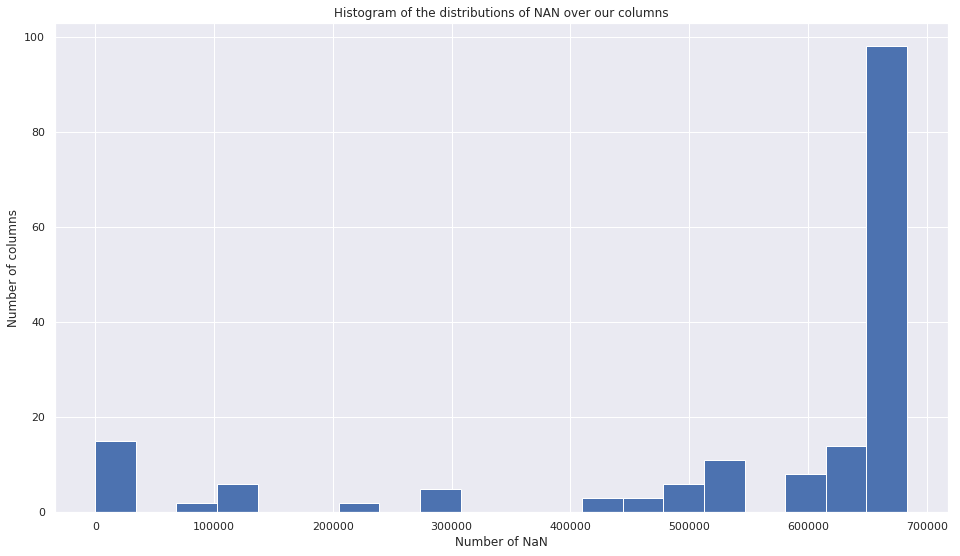

In [5]:
plt.figure(figsize=(16,9))
plt.title('Histogram of the distributions of NAN over our columns')
nan_values_per_column.hist(bins=20)
plt.xlabel('Number of NaN')
plt.ylabel('Number of columns')
plt.show()

So more than 100 columns have more than 600 000 Nan values on around 700 000 entries. We can understand from this that these columns may not be very pertinent.

In [175]:
# A list that contains the features that have more than 600 000 NAN
list_high_nan = list(nan_values_per_column[nan_values_per_column > 600000].index.values)

Let's use the `WordCloud` package to visualise these features with very high amounts of NAN.

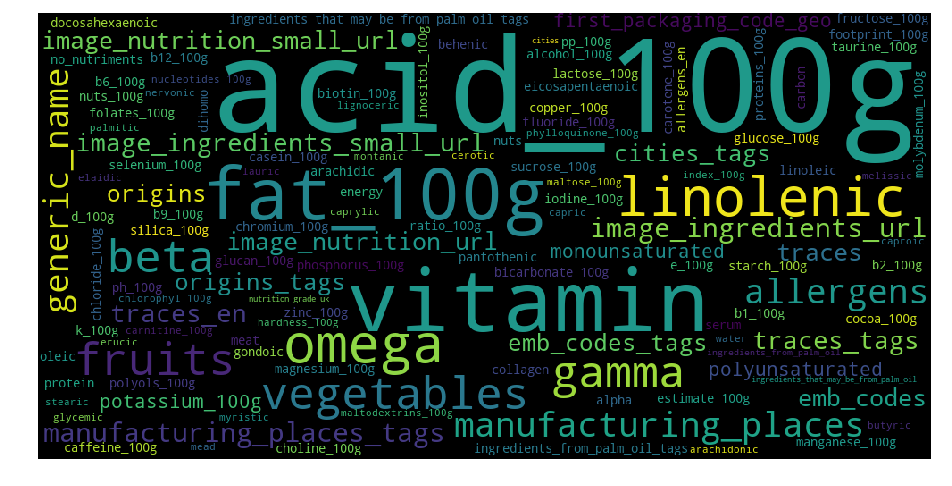

In [7]:
# convert list to string and generate
unique_string=(" ").join(list_high_nan)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [8]:
# How our DataFrame would look like if we remove all the features with the high amounts of NAN.
df_open_food_fact.drop(list_high_nan, axis=1).head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,7.8,1.40,0.551181,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,0.2,2.04,0.803150,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,...,NaN,0.9,0.42,0.165354,NaN,NaN,NaN,NaN,NaN,NaN


We now look at the number of `NAN` for each row and plot its distribution

In [9]:
# Rows containing NAN values
nan_rows = df_open_food_fact.isnull().sum(axis=1).sort_values()
nan_rows.values

array([ 29,  79,  81, ..., 163, 163, 163])

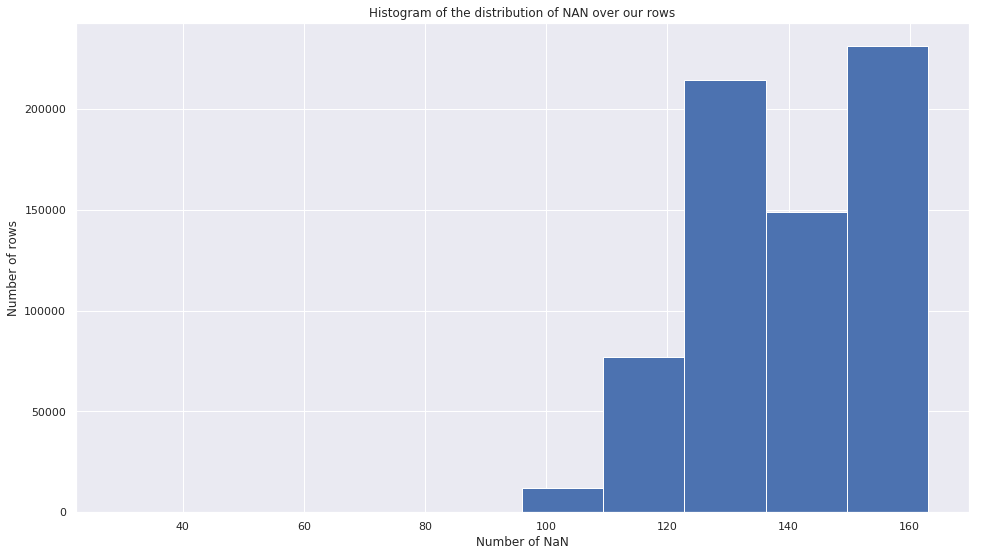

In [10]:
plt.figure(figsize=(16,9))
plt.title('Histogram of the distribution of NAN over our rows')
plt.hist(nan_rows.values)
plt.xlabel('Number of NaN')
plt.ylabel('Number of rows')
plt.show()

We notice that over the rows, we have lots of `NaN` which should not be very surprising due to the number of columns where we almost have only `NaN`.

In [11]:
# The length of rows having less than 100 NAN values in their rows
len(nan_rows[nan_rows < 100])

270

There are only __270__ on 695 207 rows that have less than 100 nan values in their columns!

We can clean the dataset by removing the columns that have very high values of NaN.

In [5]:
# We remove the features that have very high number of nan values, but keep some of them that are relevant even if 
# they also  have high numbers of NAN values

features_to_remove = list(nan_values_per_column[nan_values_per_column > 600000].index.values)
features_to_keep = ['allergens', 'ingredients_that_may_be_from_palm_oil',
                    'traces', 'emb_codes', 'origins', 'cities']

# Removing what should be removed and keeping what should be kept
features_to_remove = [item for item in features_to_remove if item not in features_to_keep]
features_to_remove.extend(['code', 'url', 'creator', 'product_name', 'serving_size', 
                           'nutrition-score-uk_100g',
                           'last_modified_t', 'last_modified_datetime'])

# When some columns are tags, we remove them because they are redundant
# We add them these redundant columns to the list of columns to remove 
for col in df_open_food_fact.columns.values:
    if '_en' in col:
        features_to_remove.append(col.replace('_en', ''))
    if 'tags' in col:
        features_to_remove.append(col)
        
# The list of redundant columns to remove
features_to_remove = set(list(features_to_remove))
cleaned_df = df_open_food_fact.drop(features_to_remove, axis=1)
cleaned_df.head()

,created_t,created_datetime,quantity,packaging,brands,categories_en,origins,labels_en,emb_codes,cities,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,1529059080,2018-06-15T10:38:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,NaN,7.8,1.40,0.551181,NaN,NaN,NaN,NaN,NaN
1,1539464774,2018-10-13T21:06:14Z,130 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1535737982,2018-08-31T17:53:02Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4,NaN,0.2,2.04,0.803150,NaN,NaN,NaN,NaN,NaN
3,1542369398,2018-11-16T11:56:38Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1542369403,2018-11-16T11:56:43Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Correcting some mistakes

#### The energy

We know that the energy a product contains can mainly be calculated through his amount of carbs, fat and proteins. We have :
- 1g of fat => 39 Kj.
- 1g of carbohydrates => 17 Kj.
- 1g of protein => 17 Kj.

By calculating the energy based on the features `fat`, `carbohydrates` and `proteins`, then comparing it to the given value of energy we can detect if some entries are wrong.

__REFERENCE:__
https://2012books.lardbucket.org/books/principles-of-general-chemistry-v1.0/s09-04-thermochemistry-and-nutrition.html

In [203]:
# We get the values of Macros, we compute our own energy and then compute the relative error between our value and 
#the energy given by the dataset

energy_data = cleaned_df.loc[:,['carbohydrates_100g', 'proteins_100g', 'fat_100g', 'energy_100g']].dropna()
energy_data['calculated_energy'] = 17*energy_data['carbohydrates_100g'] + 17*energy_data['proteins_100g'] + 39*energy_data['fat_100g']
energy_data['error(in %)'] = abs(energy_data['calculated_energy']/energy_data['energy_100g']-1) *100
energy_data.head()

,carbohydrates_100g,proteins_100g,fat_100g,energy_100g,calculated_energy,error(in %)
0,70.1,7.8,7.0,1569.0,1597.3,1.803697
2,4.8,0.2,0.0,88.0,85.0,3.409091
6,5.3,0.9,0.3,134.0,117.1,12.611940
7,16.3,4.4,4.9,540.0,543.0,0.555556
10,38.4,11.7,3.3,929.0,980.4,5.532831


In [204]:
# Small Analysis over these relative errors
energy_data['error(in %)'].replace([np.inf, -np.inf], np.nan).dropna().describe()

count    566817.000000
mean         46.292278
std        1345.501280
min           0.000000
25%           1.368613
50%           2.730583
75%           5.648305
max      509900.000000
Name: error(in %), dtype: float64

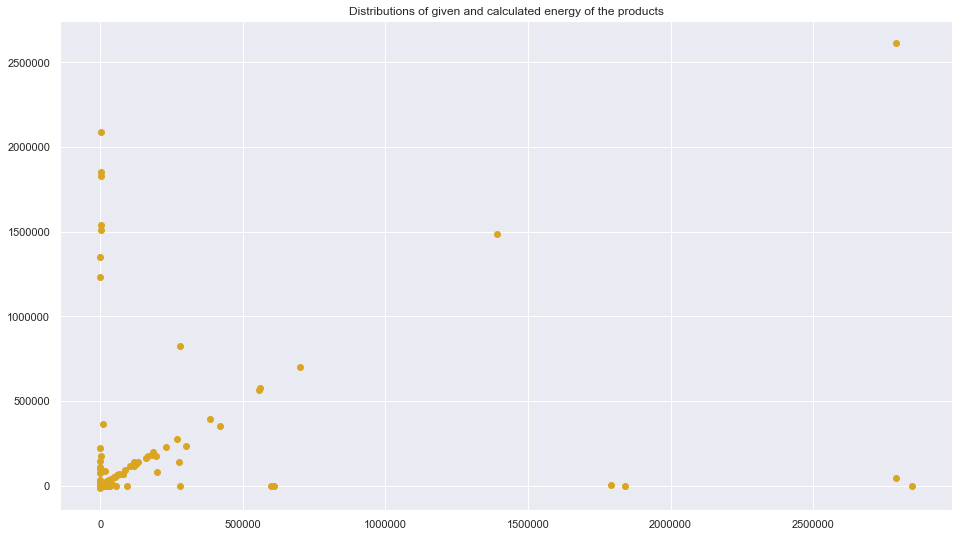

In [206]:
plt.figure(figsize=(16,9))
plt.title('Distributions of given and calculated energy of the products')
plt.scatter(energy_data["energy_100g"], energy_data["calculated_energy"], c= "goldenrod")
plt.show()

We notice that there are a lot of calculated energy values that differ from the given energy (values not on the axis `y=x`).  These wrong values may come from wrong input values entered by some users. One of the questions we should ask in our analysis afterward is __How to tackle this ?__

Another suspicious thing we noticed is that in some cases we have __Sum of features > 100g ?!__  

Our features (`carbohydrates`, `proteins` and `fats`) are given based on 100g. Then if the sum of theses features is higher than 100, we can conclude that the user put wrong values. So we can drop these rows.

In [207]:
# We compute the sum over these macros
energy_data["g_sum"] = energy_data['carbohydrates_100g'] + energy_data['proteins_100g'] + energy_data['fat_100g']
# We assign 1 anytime we exceed 100
energy_data["exceeded"] = np.where(energy_data.g_sum.values > 100, 1, 0)
# We count the number of occurences of this issue
energy_data[energy_data.exceeded == 1].count()

carbohydrates_100g    2666
proteins_100g         2666
fat_100g              2666
energy_100g           2666
calculated_energy     2666
error(in %)           2666
g_sum                 2666
exceeded              2666
dtype: int64

There are __2666__ wrong values (sum of the features > 100g), out of 588 209 values. We can drop them.

### 2. Data Visualization

#### A. Quality of food

Now that we cleaned the data, we can revisit the features we have and visualize how many Nan values they have relatively

_WordMap of the kept columns_

In [208]:
columns_kept = list(cleaned_df.columns.values)
# convert list to string and generate
unique_string=(" ").join(columns_kept)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

NameError: name 'WordCloud' is not defined

#### Products with additives

In [20]:
# We take only the products where we have additives
products_w_additives = cleaned_df.loc[:,['main_category_en','additives_n']].dropna()[cleaned_df.additives_n > 0]
sum_products_w_additives = products_w_additives.groupby('main_category_en').sum().\
                        sort_values(by=['additives_n'], ascending=False)

C:\Users\Fatine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


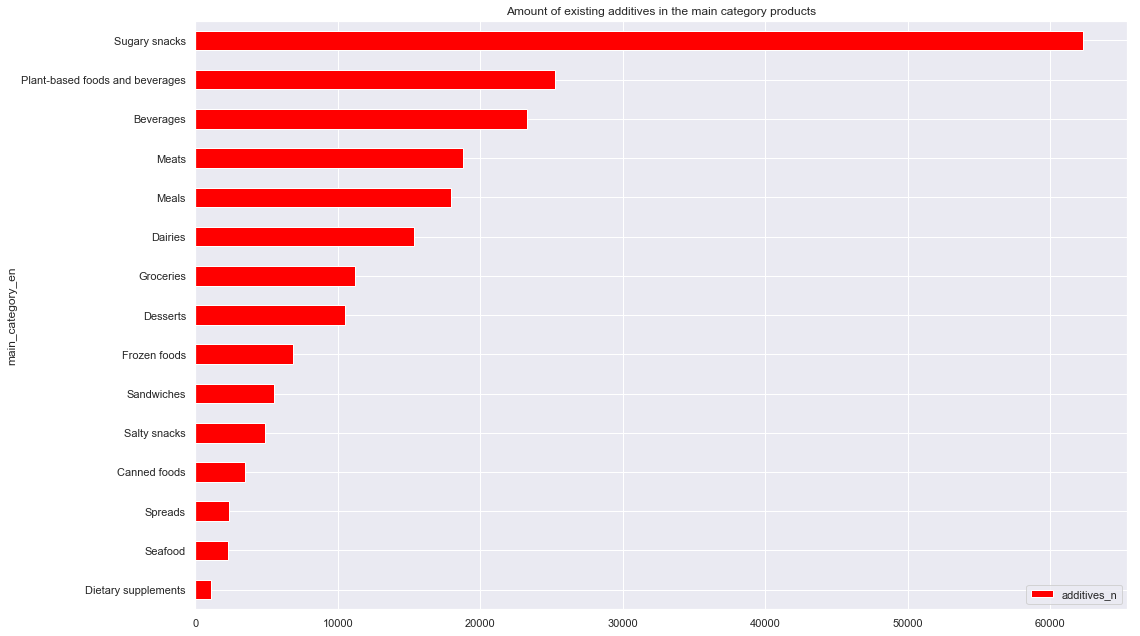

In [21]:
# We plot the amount of additives existing in the main category groupby of products
sum_products_w_additives[:15][::-1].plot(kind='barh', figsize=(16,9), color='red')
plt.title('Amount of existing additives in the main category products')
plt.tight_layout()
plt.show()

<font size="3">We notice that this plot is not really significant because the number of products of each category can greatly differ from a category to an other. Hence, it is preferable to look at the __averaged amounts__ of additives per product in each category.</font>

In [22]:
# We take only the products where we have additives
avg_products_w_additives = products_w_additives.groupby('main_category_en').mean().\
                        sort_values(by=['additives_n'], ascending=False)

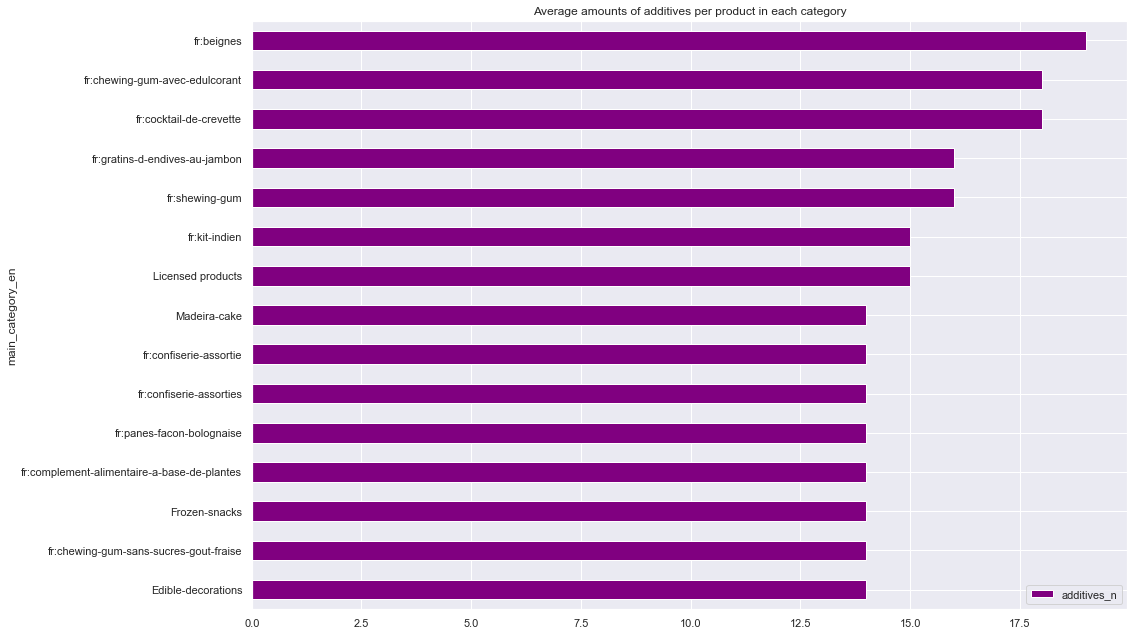

In [23]:
# We plot the amount of additives existing in the main category groupby of products
avg_products_w_additives[:15][::-1].plot(kind='barh', figsize=(16,9), color='purple')
plt.title('Average amounts of additives per product in each category')
plt.tight_layout()
plt.show()

<font size="3">As we thought, looking at the average amounts of additives per product in each category is more representative than looking only at the sum of additives over all products per category. We notice that the categories completely changed. We can assert that on average, the categories presented on the plot have the most amount of additives.</font>

#### Products with Palm Oil

In [29]:
# Products that are likely to contain palm oil
likely_palm_products = cleaned_df.loc[:,['main_category_en', 'ingredients_that_may_be_from_palm_oil_n']]\
                .dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]
likely_palm_products.groupby('main_category_en').sum().sort_values(by=['ingredients_that_may_be_from_palm_oil_n'], \
                                                         ascending=False).head()

C:\Users\Fatine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,ingredients_that_may_be_from_palm_oil_n
main_category_en,
Sugary snacks,5372.0
Plant-based foods and beverages,2639.0
Desserts,1496.0
Meals,971.0
Dairies,784.0


In [30]:
# Products that contain palm oil
palm_products = cleaned_df.loc[:,['main_category_en', 'ingredients_from_palm_oil_n']]\
                .dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]
palm_products.groupby('main_category_en').sum().sort_values(by=['ingredients_from_palm_oil_n'], \
                                                         ascending=False).head()

C:\Users\Fatine\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ingredients_from_palm_oil_n
main_category_en,
Sugary snacks,1253.0
Plant-based foods and beverages,357.0
Meals,181.0
Desserts,135.0
Frozen foods,105.0


The products containing ingredients from palm oil / may be from palm oil are especially from:
    - Sugary and salty snacks
    - Plan based food and beverages
    - Meals   

However, we should be aware that this shows us the number of products containing palm oil but not especially the products with the most amount of ingredients coming from palm oil. In the following -just like what we did for additives- we will dig into the average in order to get the products with large amount of ingredients coming from palm oil.  

In order to do this, we focus our analysis on products containing palm oil and also on those that "likely" contain palm oil.

<font size="4"><center> Average amounts of likely palm oil ingredients per category </font><center>

In [31]:
likely_palm_products.groupby('main_category_en').mean().sort_values(by=['ingredients_that_may_be_from_palm_oil_n'], \
                                                         ascending=False).head()

,ingredients_that_may_be_from_palm_oil_n
main_category_en,
es:preparacion-para-pasteles,6.0
fr:brioches-a-la-creme-patissiere,5.0
de:brotchen,3.0
fr:choux-a-la-creme,3.0
fr:viennoiseries-et-brioches,3.0


<center><font size="4"> Average amounts of palm oil ingredients per category </font><center>

In [32]:
palm_products.groupby('main_category_en').mean().sort_values(by=['ingredients_from_palm_oil_n'], \
                                                         ascending=False).head()

,ingredients_from_palm_oil_n
main_category_en,
fr:biscuits-aux-cereales,1.0
fr:pate-a-gateaux,1.0
fr:beignets-nature,1.0
fr:salade-vegetarienne,1.0
fr:plat-prepare-complet,1.0


##### Conclusion :#####


While looking at the number of products __containing/likely_containing__ palm oil, we noticed that `sugary and salty snacks` were on the top of our analysis. However, when we look at the average amounts per category, we notice that we have some categories that are less present in the dataset but with higher likely amounts of palm oil, esepcially `bakery products`.

#### Countries with Palm Oil

We first create a function that is going to split the columns containing tags with several entries in order to compute more precisely our counts.

In [34]:
def split_tags_df(df, tags_to_split, separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split

    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row, row_accumulator, tags_to_split, separator):
        split_row = row[tags_to_split].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[tags_to_split] = s
            row_accumulator.append(new_row)
    new_rows = []
    df = df.dropna(subset=[tags_to_split])
    df.apply(splitListToRows, axis=1, args = (new_rows, tags_to_split, separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [35]:
# dataframe with distinct countries, we use the field 'countries_en' because the names are clearer than in the column named
#countries_tags
cleaned_df = split_tags_df(df_open_food_fact, 'countries_en', ',')

In [37]:
df = cleaned_df.groupby('countries_en').size().reset_index(name='counts')
df[df['counts']>10].head()

,countries_en,counts
1,Albania,60
2,Algeria,500
4,Andorra,27
8,Argentina,184
9,Armenia,40


We count the number of products of our dataset that are available in each country.

In [51]:
countries_occurences = cleaned_df['countries_en'].dropna().value_counts()

We know plot a figure of the occurences of the countries to see how countries are represented in our dataset

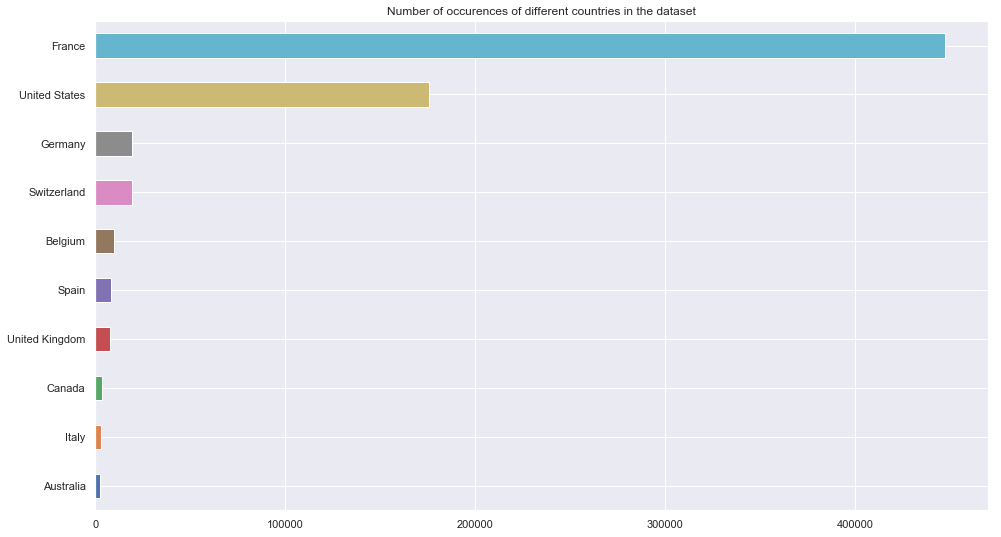

In [52]:
plt.figure(figsize=(16,9))
plt.title('Number of occurences of different countries in the dataset')
countries_occurences[:10][::-1].plot.barh()
plt.show()

So the two most represented countries are __France__ and the __US__. The problem here is that the number of products from France and then the US are so big that we cannot compare in an efficient way with the other countries.

We now want to represent these values on a map using the folium library.
We start by loading a json containing the borders of all the countries of the world.

In [40]:
geo_json_data = json.load(open("world_countries.json",encoding='utf-8'))

We then take the dataframe containing the counts of the products per country, and compute the log of the counts in order to use it in our map. In fact, the log can let us visualize a lot more easily the differences between countries, which would be harder to distinguish because France and the US are predominant.

In [194]:
#we reset the index and rename our columns
products_by_country = countries_occurences.reset_index(name='counts').rename(columns={'index': 'countries_en'})
#we remove the entries containing ":" in order to clean our dataframe
products_by_country = products_by_country.drop(products_by_country[products_by_country.countries_en.str.contains(':')].index)
#We compute the logs and sort the dataframe
products_by_country['Log_of_counts'] = np.log(products_by_country['counts'])
products_by_country.sort_values(by='Log_of_counts',ascending = False).head()

,countries_en,counts,Log_of_counts
0,France,447446,13.011311
1,United States,175486,12.075315
2,Germany,19570,9.881753
3,Switzerland,19399,9.872977
4,Belgium,9745,9.184510


When we want to visualize our countries, we need a list of all the countries that we have in order to match our data with it. Since all the names are in english, we don't have a problem of convertion.

In [195]:
all_countries = [element['properties']['name'] for element in geo_json_data['features']]

We are defining a function that we can reuse to generate layers for folium maps.

In [241]:
def generate_folium_map(dataframe,column_counts,name,our_map,column_countries='countries_en',colors=cm.linear.OrRd_03):
    ''' dataframe: dataframe containing the data,
    column_counts = name of the column containing the values to visualize
    name = name given to our layer,
    our_map = folium map to represent the layer on,
    column_countries = name of the column containing the countries

    adds a GeoJson layer to our map to visualize our data
    '''
    
    dataframe = dataframe.reset_index()
    #We separate the countries that we have the data for and the others, in order to put the countries that lack data in grey
    countries_represented = [country for country in dataframe[column_countries].values if country in all_countries]
    countries_not_represented = [country for country in all_countries if country not in countries_represented]
    
    #We define the colormap used to color the map
    max_count = dataframe[column_counts].max()
    min_count = dataframe[column_counts].min()
    colormap = colors.scale(min_count, round(max_count)).to_step(100)
    colormap.caption = name
    
    #We define the color_dict that contains the colors of each country
    color_dict = {key: colormap(dataframe.iloc[i][column_counts]) for i,key in enumerate(list( dataframe[column_countries].values))}
    for country in countries_not_represented:
        color_dict[country] = '#696969'  #Grey
        
    our_map.add_child(colormap)
    
    #We define a function that lets us extract the color of the countries
    def return_color(feature, mapping):
        return mapping[feature["properties"]["name"]]

    #We add the layer to our map
    folium.GeoJson(geo_json_data,
                name=name,
                overlay=False,
              style_function = lambda feature: {
                  'fillColor': return_color(feature, color_dict),
                  'weight': .5,
                  'fillOpacity': .8
              }).add_to(our_map)


We can then use our function to visualize the __log__ of the number of products available in each countries

In [259]:
world_map = folium.Map(tiles='cartodbpositron',location=[30,-30], zoom_start=2.5)
folium.GeoJson(geo_json_data).add_to(world_map)

generate_folium_map(products_by_country,"Log_of_counts","Products by country",world_map)


world_map

We clearly see the differences between the countries, and see that France and the US stand out.

We see also that the countries not represented in the dataset are not numerous, even if most of them only have few products.

__NB__ : The red dot in South America is Guyana which is a French territory, that is why it is red too.

#### Palm oil

We now look at the number of products with 100% probability that they have ingredients from palm oil, for each country.

In [266]:
palm_countries = cleaned_df.loc[:,['countries_en','ingredients_from_palm_oil_n']]\
                .dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]

palm_countries_grouped = palm_countries.groupby('countries_en').sum()\
                        .sort_values(by=['ingredients_from_palm_oil_n'],ascending=False)
    
palm_countries_grouped = palm_countries_grouped.drop(palm_countries_grouped[palm_countries_grouped.index.str.contains(':')].index)


palm_countries_grouped.head()

C:\Users\Fatine\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ingredients_from_palm_oil_n
countries_en,
France,3309.0
Switzerland,335.0
Belgium,138.0
United Kingdom,49.0
Germany,25.0


Text(0.5,1,'Certain occurences of palm oil in products per countries')

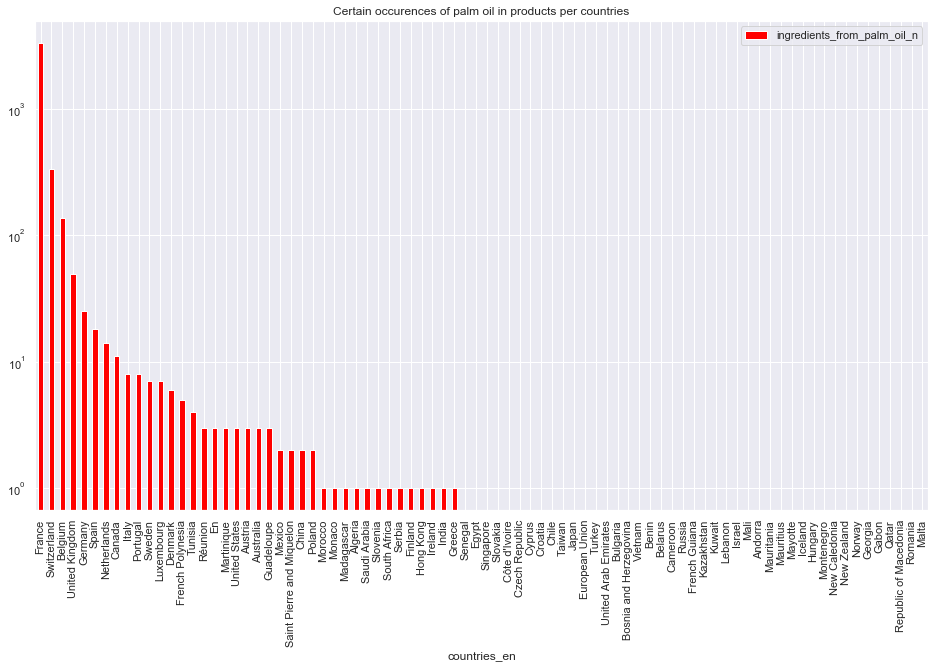

In [267]:
# The distribution of the number of certain products containing palm oil over countries
palm_countries_grouped.plot(kind='bar', figsize=(16,9), logy=True, color='red')
plt.title('Certain occurences of palm oil in products per countries')

We can visualize these countries in a map using the function already defined.

In [268]:
palm_oil_map = folium.Map(tiles='cartodbpositron',location=[30,-30], zoom_start=2.5)
folium.GeoJson(geo_json_data).add_to(world_map)

generate_folium_map(palm_countries_grouped,"ingredients_from_palm_oil_n",\
                    "Products that contain ingredients from palm oil by country",our_map=palm_oil_map,\
                    colors=cm.linear.BuPu_03)

palm_oil_map

We clearly see the differences between the countries with the biggest and smallest counts, and see that France stands out, because it is the country that is most represented in the dataset.

We see also that the countries not represented in the dataset are very numerous this time, and that's mainly because not all the information is available for all products. Most of these countries are in Africa, South America and the Middle East.

NB : The Purple dot in South America is Guyana which is a French territory, that is why it is purple too.

We now look at the number of products with uncertain ingredients from palm oil over the different countries.

In [269]:
palm_countries = cleaned_df.loc[:,['countries_en','ingredients_that_may_be_from_palm_oil_n']]\
                .dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]

palm_countries_grouped = palm_countries.groupby('countries_en').sum()\
                        .sort_values(by=['ingredients_that_may_be_from_palm_oil_n'],ascending=False)
    
palm_countries_grouped = palm_countries_grouped.drop(palm_countries_grouped[palm_countries_grouped.index.str.contains(':')].index)
    

palm_countries_grouped.head()

C:\Users\Fatine\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ingredients_that_may_be_from_palm_oil_n
countries_en,
France,21230.0
United States,4205.0
Switzerland,1330.0
Belgium,575.0
Spain,305.0


Text(0.5,1,'Unertain occurences of palm oil in products per countries')

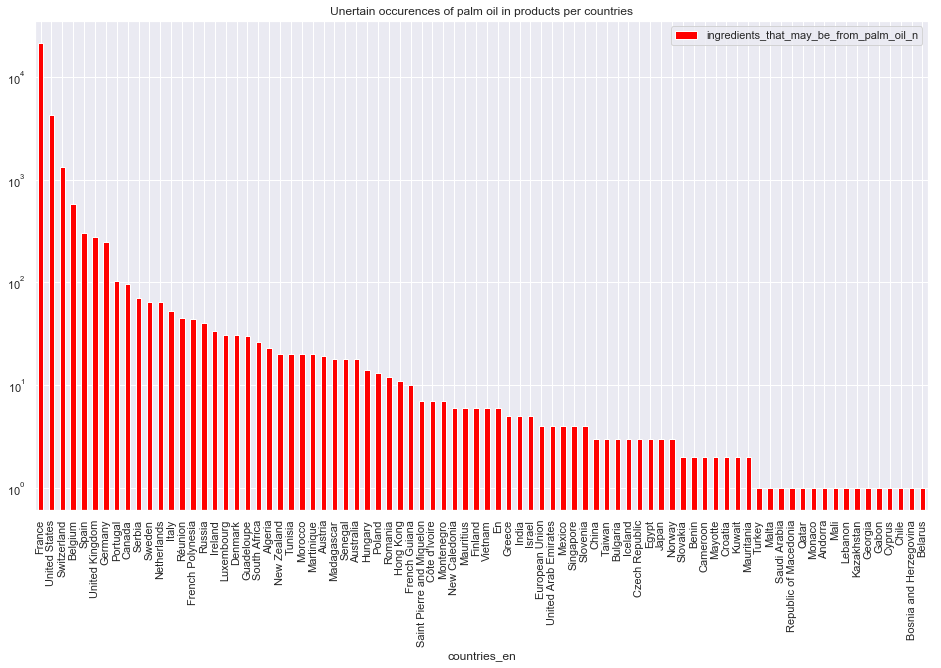

In [270]:
# The distribution of the number of uncertain products containing palm oil over countries
palm_countries_grouped.plot(kind='bar', figsize=(16,9), logy=True, color='red')
plt.title('Unertain occurences of palm oil in products per countries')

We can visualize this data on a map.

In [273]:
palm_oil_likely_map = folium.Map(tiles='cartodbpositron',location=[30,-30], zoom_start=2.5)
folium.GeoJson(geo_json_data).add_to(palm_oil_map)
generate_folium_map(palm_countries_grouped,"ingredients_that_may_be_from_palm_oil_n",
                    "Products that contain ingredients that may be from palm oil by country",our_map=palm_oil_likely_map,
                    colors=cm.linear.PuBu_08)
palm_oil_likely_map

We clearly see the differences between the countries with the biggest and smallest counts, and see that France stands out because it is the country that is most represented in the dataset.

We see also that the countries not represented in the dataset are very numerous this time, and that's mainly because not all the information is available for all products. Most of these countries are in Africa, South America and the Middle East.

NB : The Purple dot in South America is Guyana which is a French territory, that is why it is purple too.

##### _Partial Conclusion_

**France** and **USA** are the countries that are the most represented in the dataset

**France, Switzerland** and **Belgium** are the countries that have the most products with ingredients containing palm oil. (France probably because it is the most represented country in the dataset). However, by comparing the above both analysis, what we really notice is that we still have lots of products where we have uncertainity concerning the existence of the palm oil which is quite suspicious.

#### B. Carbon footprint

#### the goods with the highest carbon foodprint.

In [34]:
df_open_food_fact['carbon-footprint_100g'].describe()

count     342.000000
mean      271.528992
std       405.252492
min        -0.000281
25%         2.300000
50%       150.000000
75%       338.750000
max      2842.000000
Name: carbon-footprint_100g, dtype: float64

In [35]:
# Products containing highest amounts of carbon footprints
carbon_print = df_open_food_fact.loc[:,['main_category', 'carbon-footprint_100g']]\
                .dropna()[df_open_food_fact['carbon-footprint_100g']>0]
carbon_print.groupby('main_category').sum().sort_values(by=['carbon-footprint_100g'], ascending=False).head()

,carbon-footprint_100g
main_category,
en:sugary-snacks,25226.1000
en:meats,11430.0000
en:beverages,10297.0000
en:dairies,9960.5547
en:plant-based-foods-and-beverages,9949.5600


We notice that the highest amounts of carbon-footpring are contained in __Sugar__, then meats and beverages.  
Something interesting is that this carbon footpring tend to get high also with __meats__. Which is something that is very known, lots of studies have showed that meets are inderectly one of the most polluants concerning carbon footprint.

------------------------------------------------------------
------------------------------------------------------------